# Лабораторная 9-11. Линейные модели: Регрессия.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor, ElasticNet
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

from scipy.stats import zscore

## Основная часть.
### Задание 1. Простая линейная регрессия.
Используйте набор данных "Boston Housing" из sklearn.datasets. Постройте модель линейной регрессии, сделайте предсказания и вычислите MSE (Mean Squared Error).

In [2]:
ds_housing = fetch_california_housing()

df_housing = pd.DataFrame(data=ds_housing.data, columns=ds_housing.feature_names)
df_housing['target'] = ds_housing.target

df_housing.head(7)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992


In [3]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df_housing.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [5]:
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
df_housing = df_housing[(np.abs(zscore(df_housing)) < 3).all(axis=1)]

df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,19794.000000,19794.000000,19794.000000,19794.000000,19794.000000,19794.000000,19794.000000,19794.000000,19794.000000
mean,3.732421,28.971658,5.243471,1.068965,1344.441598,2.931222,35.636131,-119.583137,2.025858
std,1.604571,12.448220,1.221588,0.135362,811.791606,0.884634,2.137114,2.003830,1.107571
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.544400,19.000000,4.417435,1.005442,792.000000,2.426490,33.930000,-121.800000,1.184000
50%,3.500000,29.000000,5.185518,1.048193,1162.000000,2.816485,34.260000,-118.500000,1.781000
75%,4.661250,37.000000,5.970846,1.098284,1696.000000,3.284288,37.720000,-118.020000,2.600750
max,9.556100,52.000000,12.447368,2.514610,4819.000000,33.952941,41.950000,-114.550000,5.000010


In [7]:
X, y = df_housing.drop(columns='target'), df_housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [8]:
LR = LinearRegression()
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

print('MSE: ',mean_squared_error(y_test, y_pred))

MSE:  0.4528409326731233


### Задание 2. Использование кросс-валидации.
С использованием того же набора данных проведите k-fold кросс-валидацию (k=10) для своей модели и сравните среднее значения MSE на всех фолдах.

In [9]:
cv = RepeatedKFold(n_splits=10)

scores = cross_val_score(LR, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print('Результат кросс-валидации: ', np.mean(abs(scores)))

Результат кросс-валидации:  0.4541954260564331


### Задание 3. Построение Ridge регрессии.

Примените Ridge регрессию к набору данных "Boston Housing". Подберите гиперпараметр `alpha` через кросс-валидацию. 

In [10]:
alphas = np.logspace(-4, 3, 100)
score_reg = []

for alpha in alphas:
    reg = Ridge(alpha=alpha)

    score_reg.append(np.mean(cross_val_score(reg, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)))

In [11]:
score_reg_max = score_reg.index(np.max(score_reg))
print('Лучший параметр alpha для Ridge: ', alphas[score_reg_max])

Лучший параметр alpha для Ridge:  0.015556761439304723


In [12]:
ridge = Ridge(alpha=alphas[score_reg_max])
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

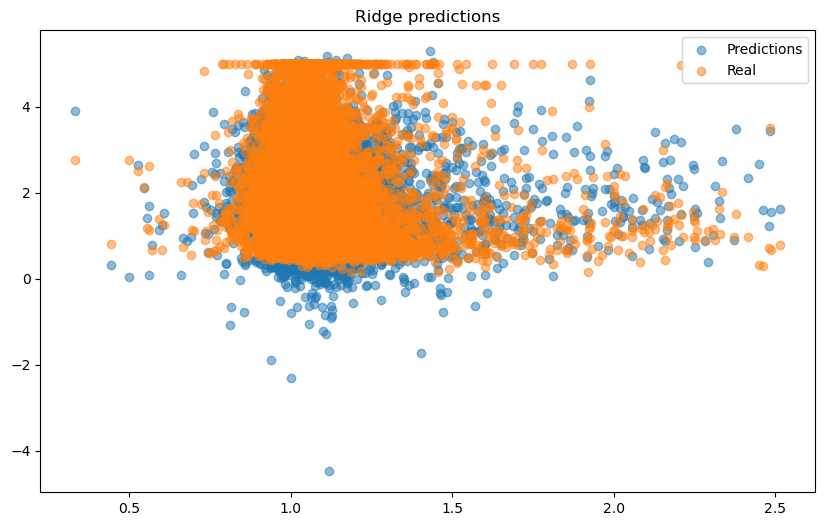

In [13]:
plt.figure(figsize=(10,6))

plt.title('Ridge predictions')

plt.scatter(X_test['AveBedrms'], y_pred, label='Predictions', alpha=0.5)
plt.scatter(X_test['AveBedrms'], y_test, label='Real',alpha=0.5)

plt.legend()
plt.show()

In [14]:
print('MSE: ', mean_squared_error(y_test, y_pred))

MSE:  0.452840941122546


### Задание 4. Построение Lasso регрессии.
Также примените Lasso регрессию к тем же данным. При подборе гиперпараметра `alpha` через кросс-валидацию сравните количество нулевых весов в модели с результатами Ridge регрессии.

In [15]:
alphas = np.logspace(-4, 3, 100)
score_reg = []

for alpha in alphas:
    reg = Lasso(alpha=alpha)

    score_reg.append(np.mean(cross_val_score(reg, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)))

In [16]:
score_reg_max = score_reg.index(np.max(score_reg))
print('Лучший параметр alpha для Lasso: ', alphas[score_reg_max])

Лучший параметр alpha для Lasso:  0.00013848863713938732


In [17]:
lasso = Lasso(alpha=alphas[score_reg_max])
lasso.fit(X_train, y_train)

print('Количество нулевых весов для Lasso: ', np.count_nonzero(lasso.coef_ == 0))
print('Количество нулевых весов для Ridge: ', np.count_nonzero(ridge.coef_ == 0))

Количество нулевых весов для Lasso:  0
Количество нулевых весов для Ridge:  0


### Задание 5. Использование других функций потерь.
Используйте набор данных diabetes из sklearn.datasets и постройте модель HuberRegressor - линейную модель с функцией потерь Хьюбера, которая менее чувствительна к выбросам по сравнению с MSE.

In [18]:
ds_diabetes = load_diabetes()

df_diabetes = pd.DataFrame(data=ds_diabetes.data, columns=ds_diabetes.feature_names)
df_diabetes['target'] = ds_diabetes.target

df_diabetes.head(7)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0


In [19]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [20]:
df_diabetes.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [21]:
df_diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [22]:
df_diabetes = df_diabetes[(np.abs(zscore(df_diabetes)) < 3).all(axis=1)]

df_diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,-0.000049,0.000137,-0.000932,0.000094,-0.001534,-0.000927,-0.001143,-0.000991,-0.000646,-0.000654,151.393023
std,0.047963,0.047629,0.046149,0.047400,0.046511,0.046147,0.044069,0.044946,0.047353,0.047600,76.278513
min,-0.107226,-0.044642,-0.090275,-0.112399,-0.126781,-0.115613,-0.102307,-0.076395,-0.126097,-0.137767,25.000000
25%,-0.037299,-0.044642,-0.034229,-0.033213,-0.034592,-0.030358,-0.032356,-0.039493,-0.034203,-0.034215,87.250000
50%,0.005383,-0.044642,-0.007284,-0.005670,-0.004321,-0.003819,-0.006584,-0.002592,-0.003301,-0.001078,140.000000
75%,0.038076,0.050680,0.030440,0.035360,0.025950,0.028200,0.026550,0.034309,0.031657,0.027917,207.500000
max,0.110727,0.050680,0.137143,0.132044,0.133274,0.131461,0.140681,0.141322,0.133597,0.135612,341.000000


In [23]:
X, y = df_diabetes.drop(columns='target'), df_diabetes['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [24]:
huber = HuberRegressor(max_iter=10000)
huber.fit(X_train, y_train)

y_pred = huber.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))

MSE:  2862.1660687758945


## Сравнение моделей.
### Задание 6. Исследование эффекта мастабирования признаков.
Используйте любой набор данных с числовыми признаками. Тренируйте модели Ridge и Lasso регрессии на исходных данных и предобработанных данных (используйте стандартизацию и нормализацию). Сравните коэффициенты моделей, полученных для исходных и предобработанных данных.

In [25]:
sc = StandardScaler()
X_sc = sc.fit_transform(X, y)

nc = MinMaxScaler()
X_nc = nc.fit_transform(X, y)

In [26]:
ridge_coef = ridge.coef_
lasso_coef = lasso.coef_

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, random_state=42)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

ridge_coef_sc = ridge.coef_
lasso_coef_sc = lasso.coef_

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_nc, y, test_size=0.2, random_state=42)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

ridge_coef_nc = ridge.coef_
lasso_coef_nc = lasso.coef_

In [29]:
for t, r, l in zip(['Исходные данные', 'Стандартизированные данные', 'Нормализованные данные'], [ridge_coef, ridge_coef_sc, ridge_coef_nc], [lasso_coef, lasso_coef_sc, lasso_coef_nc]):
    print(f'{t} c Ridge: {r}')
    print(f'{t} c Lasso: {l}')

Исходные данные c Ridge: [ 5.07954237e-01  1.12085596e-02 -1.81335746e-01  1.40703176e+00
  2.15853750e-05 -2.20677416e-01 -3.96660317e-01 -3.99270653e-01]
Исходные данные c Lasso: [ 5.07206634e-01  1.12053225e-02 -1.80243033e-01  1.39424398e+00
  2.16408927e-05 -2.20664558e-01 -3.96434492e-01 -3.98962039e-01]
Стандартизированные данные c Ridge: [ -0.89571795 -10.2859743   25.26620229  16.20195449 -52.79251861
  34.09204557  13.84481405  13.788666    40.59602758   2.90905249]
Стандартизированные данные c Lasso: [ -0.89645421 -10.28624152  25.26220705  16.20357318 -53.03443661
  34.2802949   13.9520272   13.82272424  40.689672     2.90646303]
Нормализованные данные c Ridge: [  -3.95647234  -20.61350477  125.21217382   83.41686862 -258.03017826
  154.84015722   59.99984249   62.28095529  208.6415704    17.10731456]
Нормализованные данные c Lasso: [  -4.07321878  -20.60983187  124.64248823   83.65411168 -296.33036795
  183.36153564   76.76109225   66.94265157  223.2152697    16.71298439]


### Задание 7. Изучение влияния регуляризации.
Выберите набор данных с высокой размерностью признаков. Создайте модели Lasso и Ridge регрессии. Проведите эксперименты с различными степенями регуляризации и установите, как они влияют на производительность модели и распределение весов признаков.

In [30]:
X, y = df_housing.drop(columns='target'), df_housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mse_ridge = []
mse_lasso = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)

    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)

    y_pred = ridge.predict(X_test)
    mse_ridge.append(mean_squared_error(y_test, y_pred))
    
    y_pred = lasso.predict(X_test)
    mse_lasso.append(mean_squared_error(y_test, y_pred))


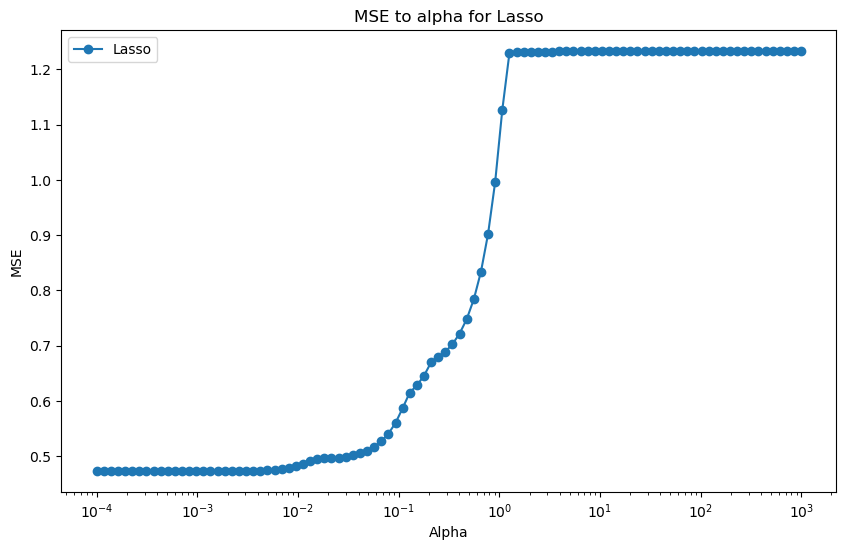

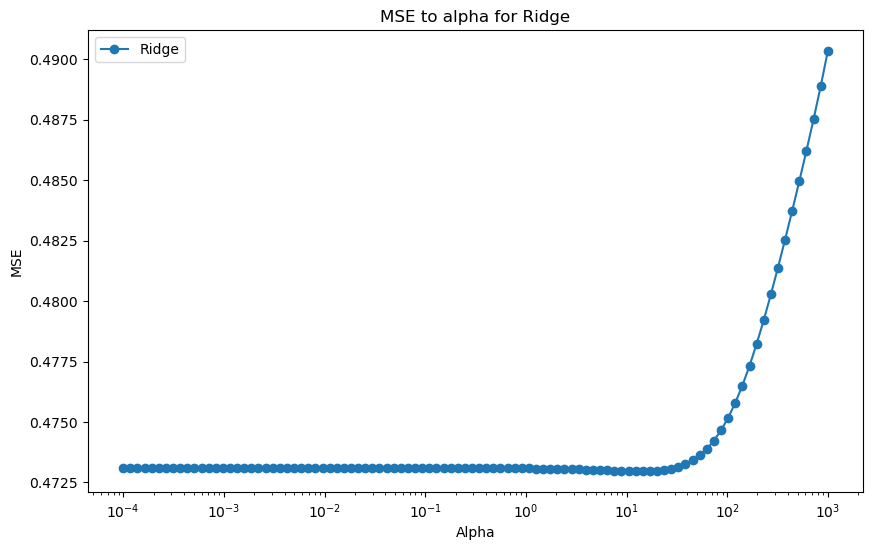

In [31]:
for label, mse in zip(['Lasso', 'Ridge'], [mse_lasso, mse_ridge]):
    plt.figure(figsize=(10, 6))
    plt.title(f'MSE to alpha for {label}')

    plt.plot(alphas, mse, marker='o', label=label)
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

### Задание 8.
На том же наборе данных обучите ElasticNet, который объединяет L1 и L2 регуляризацию. Экспериментируйте с разными соотношениями L1 и L2 регуляризации и установите, как это влияет на производительность модели.

In [32]:
ratio = np.linspace(0.1, 1, 10)

mse = []

for r in ratio:
    elasticnet = ElasticNet(l1_ratio=r, random_state=42)
    elasticnet.fit(X_train, y_train)

    y_pred = elasticnet.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))

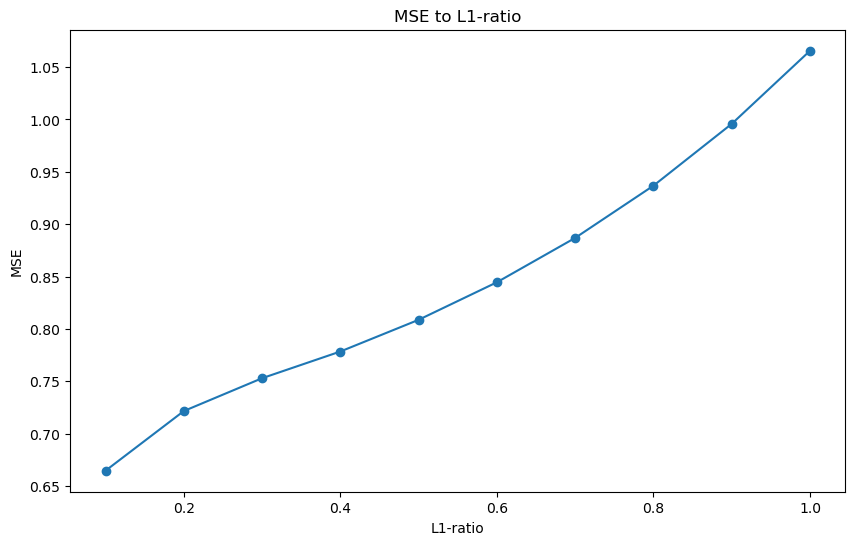

In [33]:
plt.figure(figsize=(10, 6))
plt.title('MSE to L1-ratio')

plt.plot(ratio, mse, marker='o')
plt.xlabel('L1-ratio')
plt.ylabel('MSE')
plt.show()

### Задача 9. Комбинирование методов отбора признаков и регуляризации.
Выберите подмножество признаков с помощью любого метода отбора признаков, а затем обучите модели с Lasso и Ridge регуляризацией. Сравнивай модели между собой и с моделью, построенной на всех признаках.

In [34]:
pca = PCA()
pca.fit(X, y)

X_pca = pca.fit_transform(X_train, y_train)

In [35]:
for X, type in zip([X_train, X_pca], ['Все признаки', 'PCA признаки']):
    print(f'{type}')

    ridge = Ridge()
    lasso = Lasso()

    ridge.fit(X, y_train)
    lasso.fit(X, y_train)

    y_pred = ridge.predict(X_test)
    print(f'MSE для Ridge: {mean_squared_error(y_test, y_pred)}')

    y_pred = lasso.predict(X_test)
    print(f'MSE для Lasso: {mean_squared_error(y_test, y_pred)}\n')



Все признаки
MSE для Ridge: 0.47308183281009014
MSE для Lasso: 1.065581241844658

PCA признаки
MSE для Ridge: 771272.5929673617
MSE для Lasso: 1.2613437609848825



c:\Users\Morzhig\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
c:\Users\Morzhig\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


### Задача 10. Использование метрик, устойчивых к выбросам.
Используйте набор данных diabetes из sklearn. и обучите модель HuberRegressor, которая менее чувствительна к выбросам по сравнению с MSE-метрикой. Сравните эту модель с базовой моделью линейной регрессии.

In [36]:
X, y = ds_diabetes.data, ds_diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
lr = LinearRegression()
hr = HuberRegressor()

cv = RepeatedKFold(n_splits=10)
print('Результат кросс-валидации для линейной регрессии: ', np.mean(cross_val_score(lr, X, y, cv=cv, n_jobs=-1)))
print('Результат кросс-валидации для HuberRegressor: ', np.mean(cross_val_score(hr, X, y, cv=cv, n_jobs=-1)))

Результат кросс-валидации для линейной регрессии:  0.47643214487619867
Результат кросс-валидации для HuberRegressor:  0.47279656850697793
